# What is the Best Indicator to Explain GDP?
### Group member：
 Ziyu Zeng #306092539, Chen Sun #906092466, Zile Zhan #206092634, Jennifer Qin #306083747

# Introduction

GDP is the most important way to measure the economic growth. There are many indicators related to GDP, like M2, GDP Deflator, and so on. We want to figure out which is the best index to explain GDP among those common indexs, so we selected the 10 most relevant indicators to GDP, using quarterly data of them and GDP to construct the dataset. We have 208 data points for each item in our dataset. All data are from the Federal Economic Database (https://fred.stlouisfed.org/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from RegscorePy import mallow
import itertools
df = pd.read_excel('GDP.xls')
df.describe()
df=df.dropna()
df.head()

,Date,gdp,m2,gdp_deflator,gov_expense,wti_oil,consumer_sentiment,awhp,ppi,labor_participation,sp500,net_exports
0,1970-01-01,1051.200,587.733333,21.280,208.693,3.350000,75.4,40.233333,36.633333,60.466667,89.543333,3.514
1,1970-04-01,1067.375,591.700000,21.577,220.110,3.350000,77.6,39.800000,36.833333,60.366667,76.930000,5.207
2,1970-07-01,1086.059,605.066667,21.754,223.370,3.310000,72.4,39.800000,37.033333,60.300000,81.290000,4.088
3,1970-10-01,1088.608,621.333333,22.042,227.603,3.393333,78.1,39.500000,37.100000,60.400000,87.533333,2.985
4,1971-01-01,1135.156,641.266667,22.376,233.120,3.560000,80.2,39.800000,37.600000,60.166667,97.646667,4.570


In [2]:
df.describe()

,gdp,m2,gdp_deflator,gov_expense,wti_oil,consumer_sentiment,awhp,ppi,labor_participation,sp500,net_exports
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,9318.991966,5578.971474,70.475125,2098.529962,36.634394,84.891186,40.817788,129.105822,64.388622,934.197083,-278.986837
std,6453.263246,4757.019660,27.733521,1652.249108,27.529745,12.224342,0.755498,51.340491,2.101032,943.149767,273.224225
min,1051.200000,587.733333,21.280000,208.693000,3.310000,54.366667,38.666667,36.633333,60.033333,70.810000,-914.708000
25%,3455.700000,1964.458333,50.269750,830.721500,17.562750,75.475000,40.333333,99.825000,62.866667,145.987500,-523.613000
50%,7820.527000,3643.233333,72.516000,1686.030500,28.031667,87.266667,40.800000,124.400000,64.483333,620.791667,-127.443000
75%,14665.070500,8122.141667,94.877500,3341.438250,52.085833,93.625000,41.400000,177.583333,66.300000,1343.352500,-28.887000
max,24349.121000,21327.800000,121.708000,8896.416000,123.963333,110.133333,42.166667,241.696667,67.300000,4646.186667,21.582000


# 1. Descriptive Analysis:

## Histogram,Q-Q plot for GDP

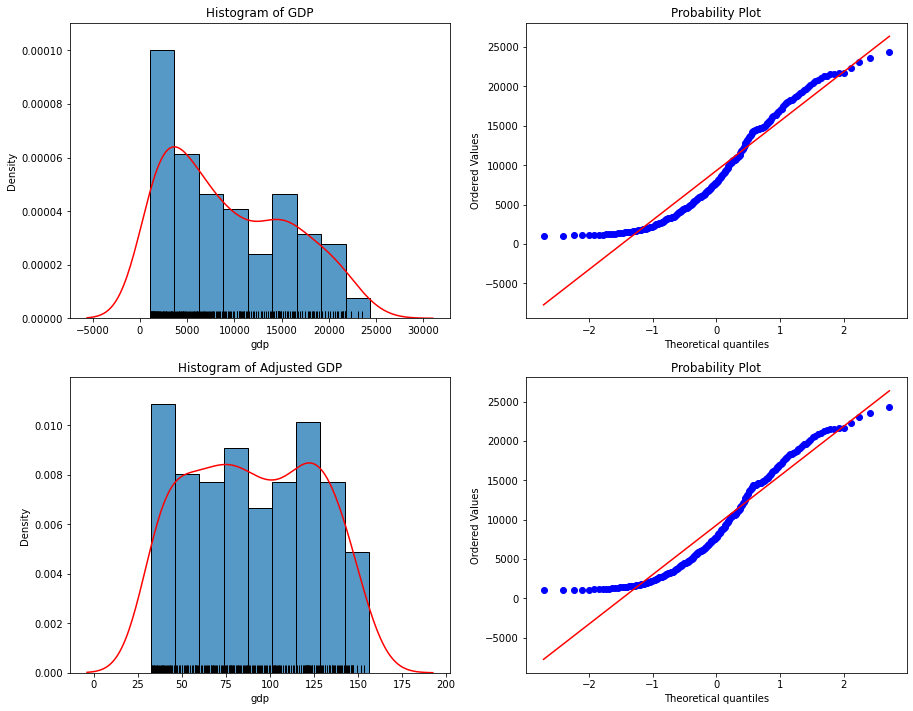

lambda of gdp =  0.35247946948134784


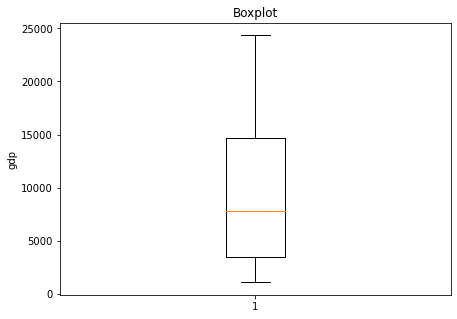

In [4]:
fig=plt.figure(figsize=(15,25))

ax=fig.add_subplot(4,2,1) 
sns.histplot(df['gdp'],stat = 'density')
sns.kdeplot(df['gdp'], color = 'red')
sns.rugplot(df['gdp'], color = 'black')
ax.set_title('Histogram of GDP')

ax=fig.add_subplot(4,2,2) 
stats.probplot(df['gdp'], dist = 'norm', plot = plt)

ax=fig.add_subplot(4,2,3)
sns.histplot(df['gdp']**0.5,stat = 'density')
sns.kdeplot(df['gdp']**0.5, color = 'red')
sns.rugplot(df['gdp']**0.5, color = 'black')
ax.set_title('Histogram of Adjusted GDP')

ax=fig.add_subplot(4,2,4)
stats.probplot(df['gdp'], dist = 'norm', plot = plt)
plt.show()

bc_gdp,lambda_gdp = stats.boxcox(df['gdp'])
print('lambda of gdp = ', lambda_gdp)

plt.figure(figsize=(7,5))
plt.boxplot(df['gdp'])
plt.ylabel('gdp')
plt.title('Boxplot')
plt.show()

df['agdp'] = df['gdp']**0.5

### GDP:
(a) & (b) From the density estimation, we can tell that GDP is right skewed. In addition, from the Q-Q Plot we can tell that GDP is not normally distributed. 

(c) From power transformation test which result in 0.352, we will use GDP^0.5 as transformation to make it normally distributed. If we do not transform the data, the majority of sample is clustered on the lower values, which will make the regression result unstable. Then, we will get biased result in the following OLS models analysis.

(d) There are no outliers or unusual features from the boxplot.

(e) There is no null value in this dataset.

## Histogram,Q-Q plot for M2

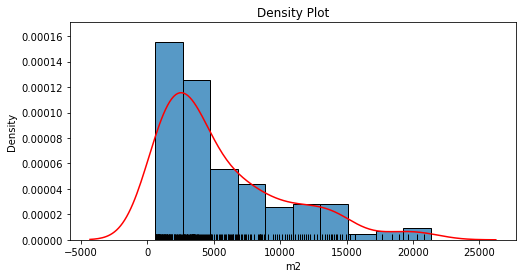

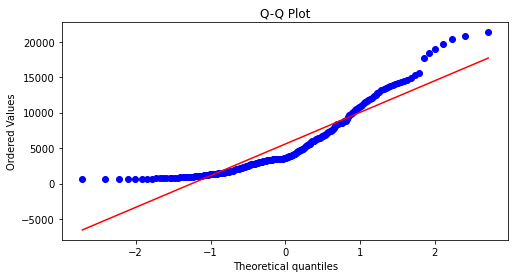

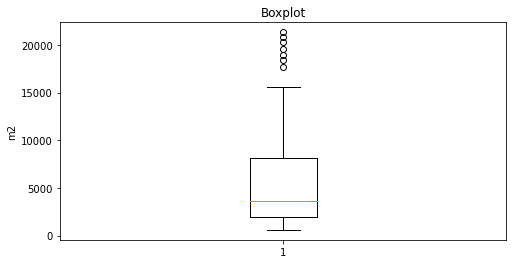

<Figure size 576x288 with 0 Axes>

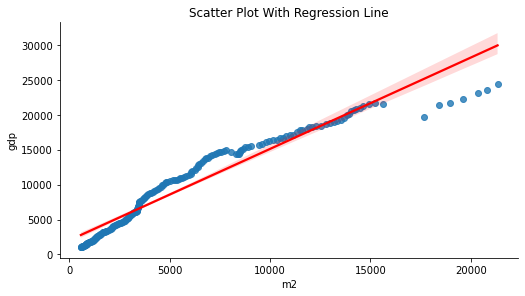

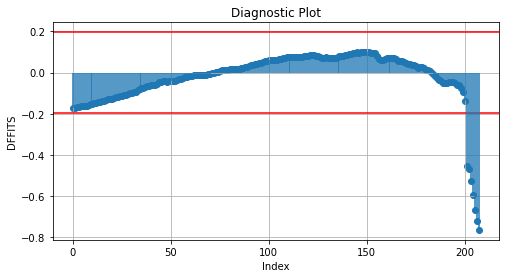

lambda = 0.10220933607864843 , which approximately equals to zero.


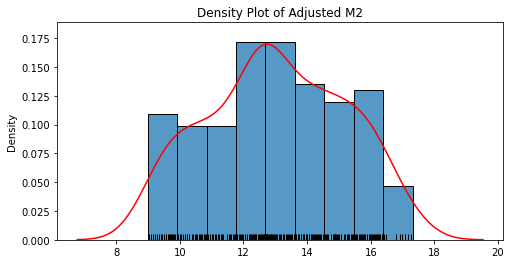

                            OLS Regression Results                            
Dep. Variable:                   agdp   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1113.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           5.33e-85
Time:                        22:01:46   Log-Likelihood:                -842.37
No. Observations:                 208   AIC:                             1689.
Df Residuals:                     206   BIC:                             1695.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.9681      1.493     34.802      0.0

In [46]:
#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['m2'],stat = 'density')
sns.kdeplot(df['m2'], color = 'red')
sns.rugplot(df['m2'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['m2'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['m2'])
plt.ylabel('m2')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
plt.figure(figsize = (8,4))
sns.lmplot(data=df,x='m2',y='gdp',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

#Regression result
m2_reg = smf.ols('agdp~m2',data = df) 
m2_results = m2_reg.fit()
m2_results.params


#DFFITS
plt.figure(figsize = (8,4))
m2_dffits,m2_threshold = m2_results.get_influence().dffits
plt.scatter(df.index, m2_dffits)
plt.axhline(m2_threshold,color = 'red')
plt.axhline(-m2_threshold,color = 'red')
plt.vlines(x=df.index,ymin=0,ymax=m2_dffits)
plt.xlabel('Index')
plt.ylabel('DFFITS')
plt.title('Diagnostic Plot')
plt.grid()
plt.show()

#Check for Linear Transformation
bc_m2,lambda_m2  = stats.boxcox(df['m2'])
print('lambda =', lambda_m2,', which approximately equals to zero.')
plt.figure(figsize = (8,4))
plt.title('Density Plot of Adjusted M2')
sns.histplot(bc_m2, stat = 'density')
sns.kdeplot(bc_m2, color = 'red')
sns.rugplot(bc_m2, color = 'black')
plt.show()

#Regression result after log transformation 
m2_reg1 = smf.ols('agdp~np.log(m2)',data = df) 
m2_results1 = m2_reg1.fit()
m2_results1.params

print(m2_results.summary())
print(m2_results1.summary())
#The JB test for new regression result is much lower than the old result.
#The R square is improved.
#The new density plot is nearly normal distributed.
#Therefore, it needs to use log transformation.

## Histogram,Q-Q plot for GDP Deflator

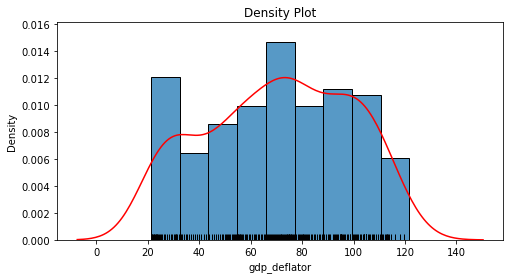

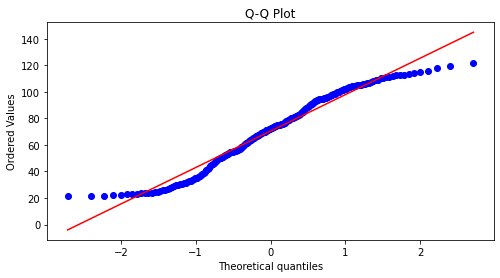

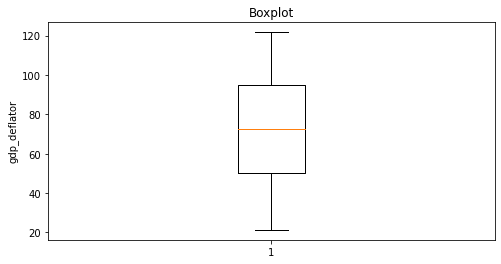

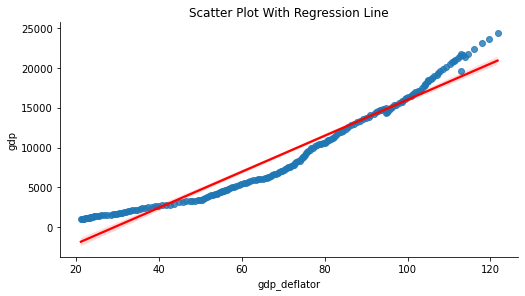

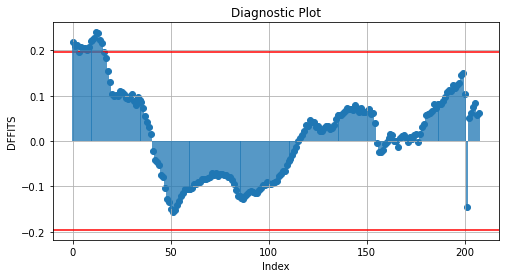

lambda = 0.9587788198779629 , which approximately equals to one.
                            OLS Regression Results                            
Dep. Variable:                   agdp   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.566e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):          3.61e-218
Time:                        22:02:23   Log-Likelihood:                -532.84
No. Observations:                 208   AIC:                             1070.
Df Residuals:                     206   BIC:                             1076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [47]:
#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['gdp_deflator'],stat = 'density')
sns.kdeplot(df['gdp_deflator'], color = 'red')
sns.rugplot(df['gdp_deflator'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['gdp_deflator'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['gdp_deflator'])
plt.ylabel('gdp_deflator')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
sns.lmplot(data=df,x='gdp_deflator',y='gdp',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

#Regression result
deflator_reg = smf.ols('agdp~gdp_deflator',data = df) 
deflator_results = deflator_reg.fit()
deflator_results.params


#DFFITS
plt.figure(figsize = (8,4))
deflator_dffits,deflator_threshold = deflator_results.get_influence().dffits
plt.scatter(df.index, deflator_dffits)
plt.axhline(deflator_threshold,color = 'red')
plt.axhline(-deflator_threshold,color = 'red')
plt.vlines(x=df.index,ymin=0,ymax=deflator_dffits)
plt.xlabel('Index')
plt.ylabel('DFFITS')
plt.title('Diagnostic Plot')
plt.grid()
plt.show()

#Check for Linear Transformation
bc_deflator,lambda_deflator  = stats.boxcox(df['gdp_deflator'])
print('lambda =', lambda_deflator,', which approximately equals to one.')

print(deflator_results.summary())
#The JB test for old regression result is lower than the new result.
#The R square is worse off.
#Therefore, do not need linear transformation.

## Histogram,Q-Q plot for Government Expenditure

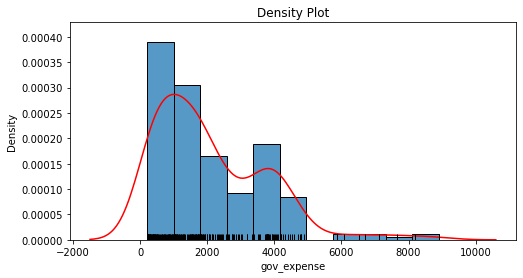

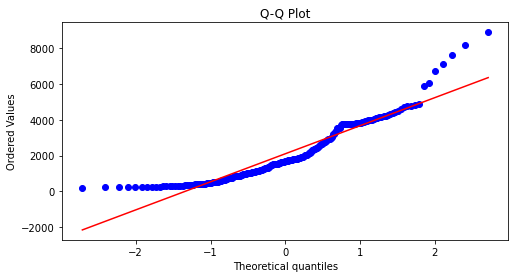

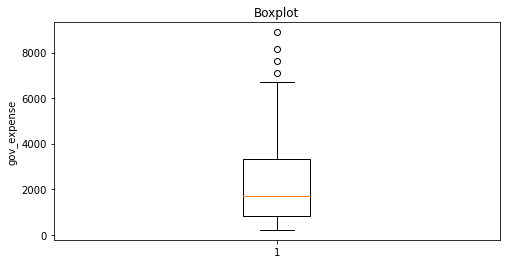

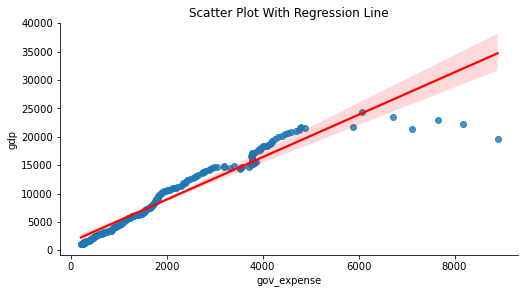

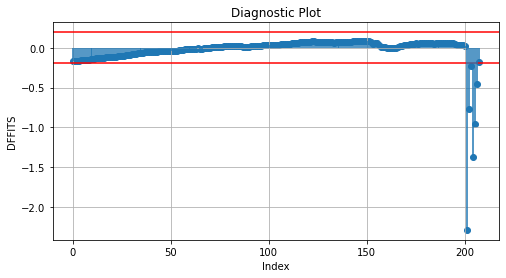

lambda = 0.22723731467833996 , which approximately equals to zero. Therefore, use log transformation.


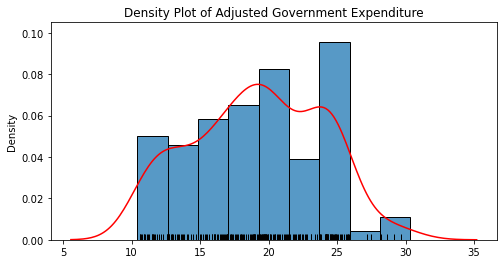

                            OLS Regression Results                            
Dep. Variable:                   agdp   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     1247.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           2.45e-89
Time:                        22:03:08   Log-Likelihood:                -832.29
No. Observations:                 208   AIC:                             1669.
Df Residuals:                     206   BIC:                             1675.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      48.4698      1.492     32.480      

In [48]:
#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['gov_expense'],stat = 'density')
sns.kdeplot(df['gov_expense'], color = 'red')
sns.rugplot(df['gov_expense'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['gov_expense'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['gov_expense'])
plt.ylabel('gov_expense')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
sns.lmplot(data=df,x='gov_expense',y='gdp',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

#Regression result
expense_reg = smf.ols('agdp~gov_expense',data = df) 
expense_results = expense_reg.fit()
expense_results.params


#DFFITS
plt.figure(figsize = (8,4))
expense_dffits,expense_threshold = expense_results.get_influence().dffits
plt.scatter(df.index, expense_dffits)
plt.axhline(expense_threshold,color = 'red')
plt.axhline(-expense_threshold,color = 'red')
plt.vlines(x=df.index,ymin=0,ymax=expense_dffits)
plt.xlabel('Index')
plt.ylabel('DFFITS')
plt.title('Diagnostic Plot')
plt.grid()
plt.show()

#Check for Linear Transformation
bc_expense,lambda_expense  = stats.boxcox(df['gov_expense'])
print('lambda =', lambda_expense,', which approximately equals to zero. Therefore, use log transformation.')
plt.figure(figsize = (8,4))
plt.title('Density Plot of Adjusted Government Expenditure')
sns.histplot(bc_expense, stat = 'density')
sns.kdeplot(bc_expense, color = 'red')
sns.rugplot(bc_expense, color = 'black')
plt.show()

#Regression result after log transformation 
expense_reg1 = smf.ols('agdp~np.log(gov_expense)',data = df) 
expense_results1 = expense_reg1.fit()
expense_results1.params

print(expense_results.summary())
print(expense_results1.summary())
#The JB test for new regression result is much lower than the old result.
#The R square is improved.
#The new density plot is nearly normal distributed.

## Histogram,Q-Q plot for WTI Oil

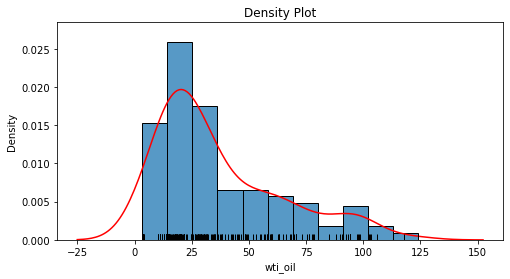

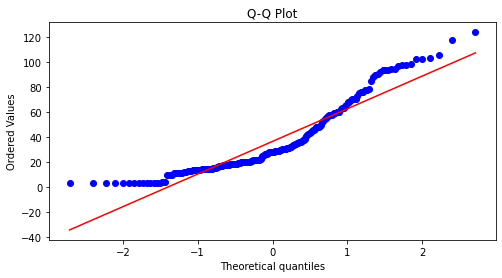

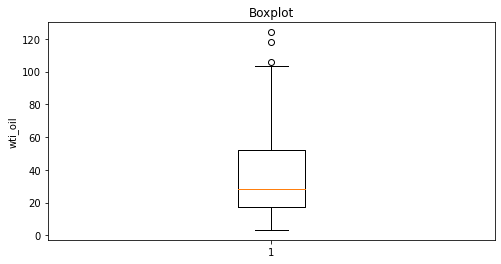

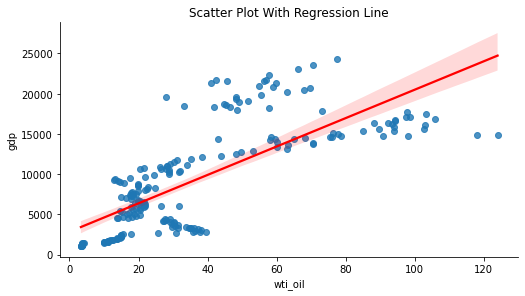

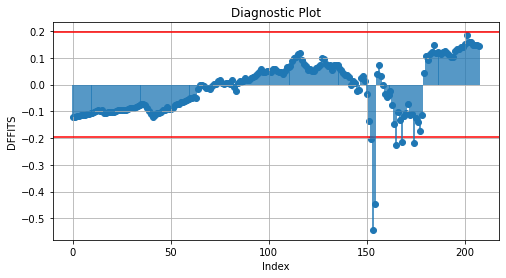

Since lambda = 0.25273689838894275 , which approximately equals to zero. Then, use log transformation.


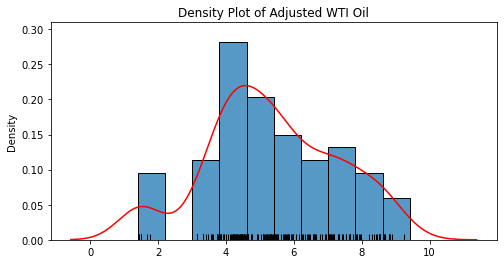

                            OLS Regression Results                            
Dep. Variable:                   agdp   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     262.4
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           1.34e-38
Time:                        22:03:50   Log-Likelihood:                -950.04
No. Observations:                 208   AIC:                             1904.
Df Residuals:                     206   BIC:                             1911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.8328      2.707     20.258      0.0

In [49]:
#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['wti_oil'],stat = 'density')
sns.kdeplot(df['wti_oil'], color = 'red')
sns.rugplot(df['wti_oil'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['wti_oil'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['wti_oil'])
plt.ylabel('wti_oil')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
sns.lmplot(data=df,x='wti_oil',y='gdp',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

#Regression result
wti_reg = smf.ols('agdp~wti_oil',data = df) 
wti_results = wti_reg.fit()
wti_results.params


#DFFITS
wti_dffits,wti_threshold = wti_results.get_influence().dffits
plt.figure(figsize = (8,4))
plt.scatter(df.index, wti_dffits)
plt.axhline(wti_threshold,color = 'red')
plt.axhline(-wti_threshold,color = 'red')
plt.vlines(x=df.index,ymin=0,ymax=wti_dffits)
plt.xlabel('Index')
plt.ylabel('DFFITS')
plt.title('Diagnostic Plot')
plt.grid()
plt.show()

#Check for Linear Transformation
bc_wti,lambda_wti  = stats.boxcox(df['wti_oil'])
print('Since lambda =', lambda_wti,', which approximately equals to zero. Then, use log transformation.')
plt.figure(figsize = (8,4))
plt.title('Density Plot of Adjusted WTI Oil')
sns.histplot(bc_wti, stat = 'density')
sns.kdeplot(bc_wti, color = 'red')
sns.rugplot(bc_wti, color = 'black')
plt.show()

#Regression result after log transformation 
wti_reg1 = smf.ols('agdp~np.log(wti_oil)',data = df) 
wti_results1 = wti_reg1.fit()
wti_results1.params

print(wti_results.summary())
print(wti_results1.summary())
#The JB test for new regression result is much lower than the old result.
#The R square is improved.
#The new density plot is nearly normal distributed.

## Histogram,Q-Q plot for Consumer Sentiment

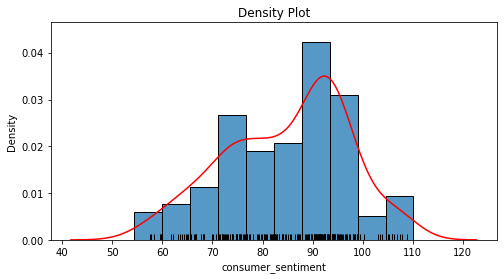

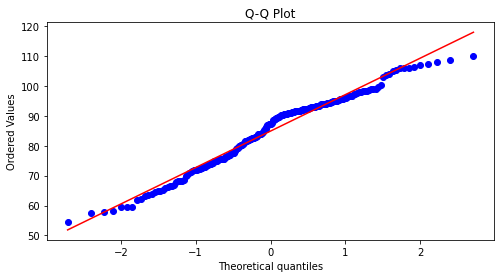

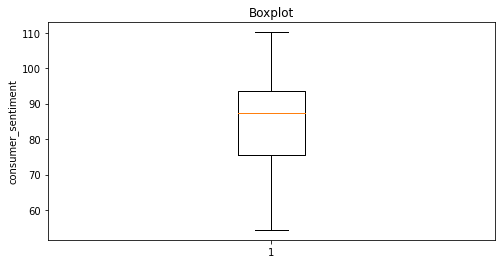

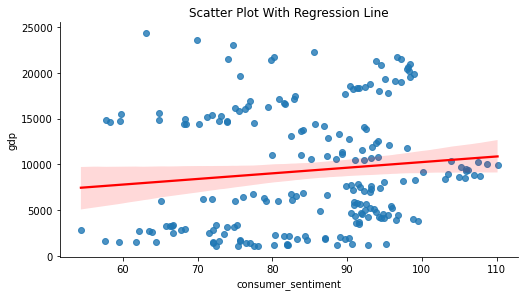

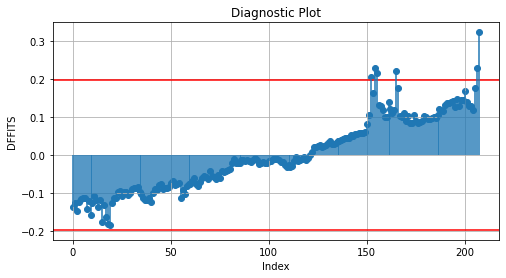

lambda = 1.8704658376655134 , which approximately equals to two.
                            OLS Regression Results                            
Dep. Variable:                   agdp   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     6.067
Date:                Tue, 18 Oct 2022   Prob (F-statistic):             0.0146
Time:                        22:04:27   Log-Likelihood:                -1032.4
No. Observations:                 208   AIC:                             2069.
Df Residuals:                     206   BIC:                             2076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [50]:
#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['consumer_sentiment'],stat = 'density')
sns.kdeplot(df['consumer_sentiment'], color = 'red')
sns.rugplot(df['consumer_sentiment'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['consumer_sentiment'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['consumer_sentiment'])
plt.ylabel('consumer_sentiment')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
sns.lmplot(data=df,x='consumer_sentiment',y='gdp',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

#Regression result
consumer_reg = smf.ols('agdp~consumer_sentiment',data = df) 
consumer_results = consumer_reg.fit()
consumer_results.params


#DFFITS
consumer_dffits,consumer_threshold = consumer_results.get_influence().dffits
plt.figure(figsize = (8,4))
plt.scatter(df.index, consumer_dffits)
plt.axhline(consumer_threshold,color = 'red')
plt.axhline(-consumer_threshold,color = 'red')
plt.vlines(x=df.index,ymin=0,ymax=consumer_dffits)
plt.xlabel('Index')
plt.ylabel('DFFITS')
plt.title('Diagnostic Plot')
plt.grid()
plt.show()

#Check for Linear Transformation
bc_consumer,lambda_consumer  = stats.boxcox(df['consumer_sentiment'])
print('lambda =', lambda_consumer,', which approximately equals to two.')

print(consumer_results.summary())
#The JB test for new regression result is roughly the same as the old result.
#The R square is nearly the same as well.
#So, there is no need to do any transformation.

## Histogram,Q-Q plot for Average Weekly Hours Production

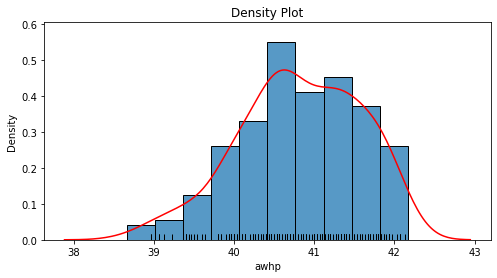

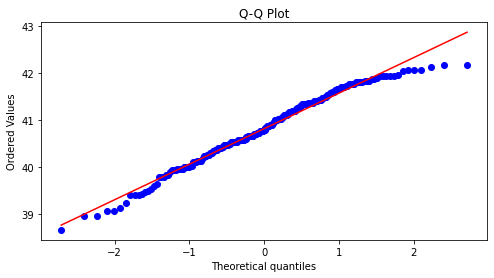

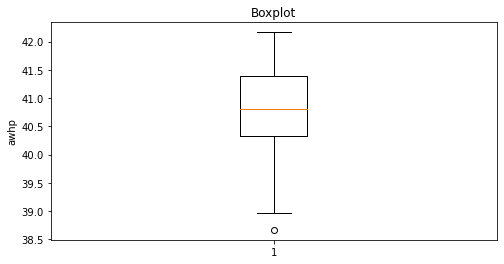

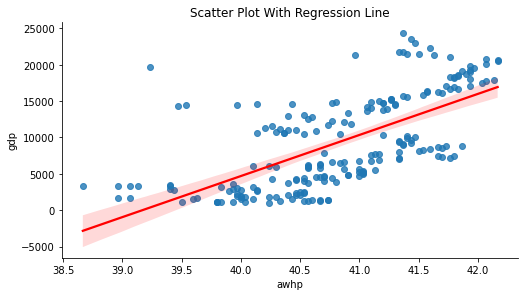

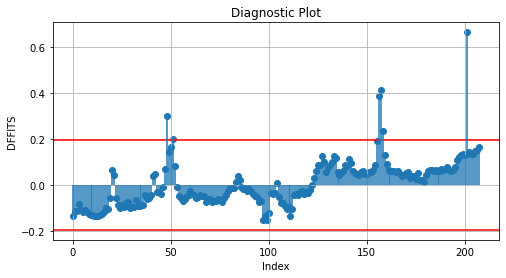

Since lambda = 9.104623300852113 , which approximately equals to 9.
                            OLS Regression Results                            
Dep. Variable:                   agdp   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     175.9
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           1.98e-29
Time:                        22:04:58   Log-Likelihood:                -971.27
No. Observations:                 208   AIC:                             1947.
Df Residuals:                     206   BIC:                             1953.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [51]:
#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['awhp'],stat = 'density')
sns.kdeplot(df['awhp'], color = 'red')
sns.rugplot(df['awhp'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['awhp'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['awhp'])
plt.ylabel('awhp')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
sns.lmplot(data=df,x='awhp',y='gdp',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

#Regression result
awhp_reg = smf.ols('agdp~awhp',data = df) 
awhp_results = awhp_reg.fit()
awhp_results.params
awhp_results.summary()

#DFFITS
awhp_dffits,awhp_threshold = awhp_results.get_influence().dffits
plt.figure(figsize = (8,4))
plt.scatter(df.index, awhp_dffits)
plt.axhline(awhp_threshold,color = 'red')
plt.axhline(-awhp_threshold,color = 'red')
plt.vlines(x=df.index,ymin=0,ymax=awhp_dffits)
plt.xlabel('Index')
plt.ylabel('DFFITS')
plt.title('Diagnostic Plot')
plt.grid()
plt.show()

#Check for Linear Transformation
bc_awhp,lambda_awhp  = stats.boxcox(df['awhp'])
print('Since lambda =', lambda_awhp,', which approximately equals to 9.')

print(awhp_results.summary())
#Since the range of lambda are usually around (-5,5), and the origin histgram is almost normaly distributed.
#So, there is no need to do any transformation.

## Histogram,Q-Q plot for PPI

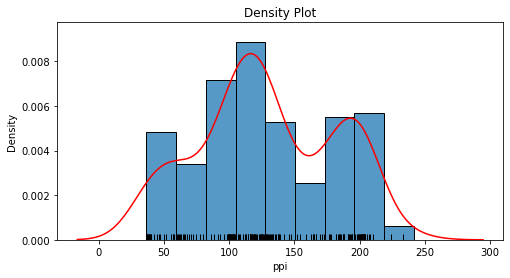

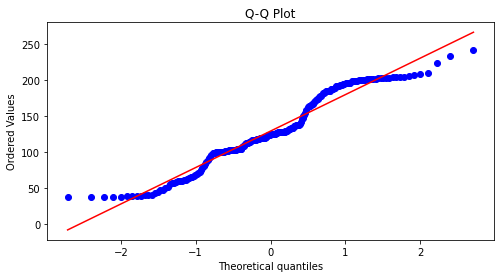

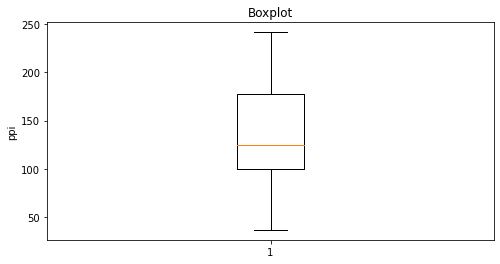

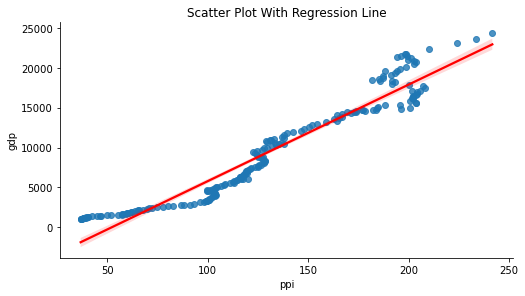

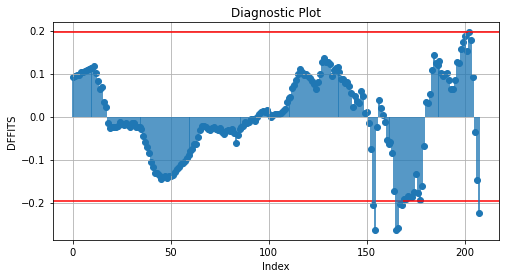

lambda = 0.8152164274547427 , which approximately equals to 1.
                            OLS Regression Results                            
Dep. Variable:                   agdp   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     4646.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):          2.69e-143
Time:                        22:05:28   Log-Likelihood:                -706.90
No. Observations:                 208   AIC:                             1418.
Df Residuals:                     206   BIC:                             1424.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [52]:
#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['ppi'],stat = 'density')
sns.kdeplot(df['ppi'], color = 'red')
sns.rugplot(df['ppi'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['ppi'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['ppi'])
plt.ylabel('ppi')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
sns.lmplot(data=df,x='ppi',y='gdp',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

#Regression result
ppi_reg = smf.ols('agdp~ppi',data = df) 
ppi_results = ppi_reg.fit()
ppi_results.params

#DFFITS
ppi_dffits,ppi_threshold = ppi_results.get_influence().dffits
plt.figure(figsize = (8,4))
plt.scatter(df.index, ppi_dffits)
plt.axhline(ppi_threshold,color = 'red')
plt.axhline(-ppi_threshold,color = 'red')
plt.vlines(x=df.index,ymin=0,ymax=ppi_dffits)
plt.xlabel('Index')
plt.ylabel('DFFITS')
plt.title('Diagnostic Plot')
plt.grid()
plt.show()

#Check for Linear Transformation
bc_ppi,lambda_ppi  = stats.boxcox(df['ppi'])
print('lambda =', lambda_ppi,', which approximately equals to 1.')

print(ppi_results.summary())
#The JB test for old regression result is lower than the new result.
#The R square is worse off.
#Therefore, do not need linear transformation.

## Histogram,Q-Q plot for Labor Force Participation Rate

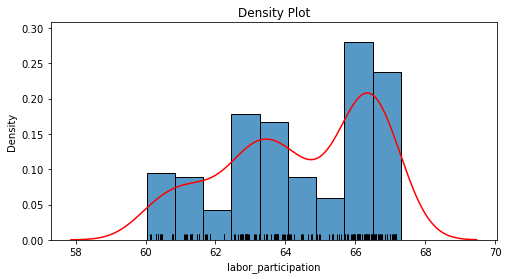

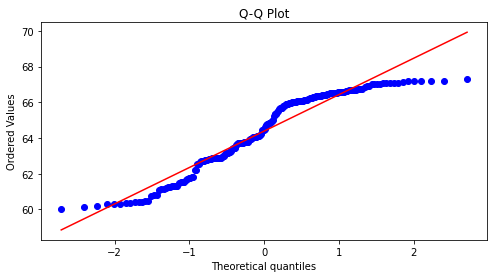

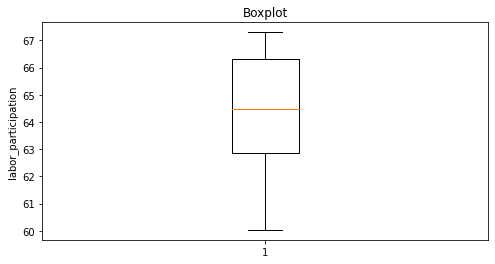

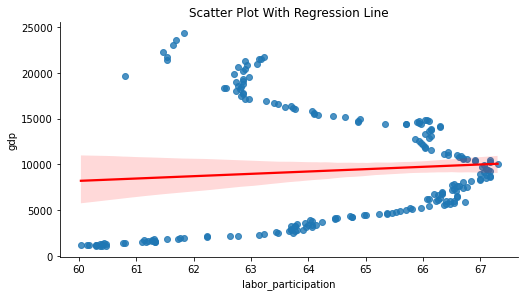

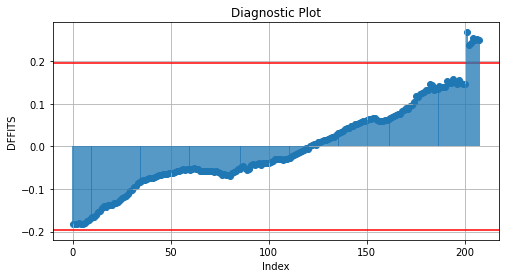

lambda = 9.10075791929443 , which approximately equals to 9.
                            OLS Regression Results                            
Dep. Variable:                   agdp   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     13.17
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           0.000358
Time:                        22:06:02   Log-Likelihood:                -1029.0
No. Observations:                 208   AIC:                             2062.
Df Residuals:                     206   BIC:                             2069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [53]:
#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['labor_participation'],stat = 'density')
sns.kdeplot(df['labor_participation'], color = 'red')
sns.rugplot(df['labor_participation'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['labor_participation'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['labor_participation'])
plt.ylabel('labor_participation')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
sns.lmplot(data=df,x='labor_participation',y='gdp',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

#Regression result
labor_reg = smf.ols('agdp~labor_participation',data = df) 
labor_results = labor_reg.fit()
labor_results.params
labor_results.summary()


#DFFITS
labor_dffits,labor_threshold = labor_results.get_influence().dffits
plt.figure(figsize = (8,4))
plt.scatter(df.index, labor_dffits)
plt.axhline(labor_threshold,color = 'red')
plt.axhline(-labor_threshold,color = 'red')
plt.vlines(x=df.index,ymin=0,ymax=labor_dffits)
plt.xlabel('Index')
plt.ylabel('DFFITS')
plt.title('Diagnostic Plot')
plt.grid()
plt.show()

#Check for Linear Transformation
bc_labor,lambda_labor  = stats.boxcox(df['labor_participation'])
print('lambda =', lambda_labor,', which approximately equals to 9.')

print(labor_results.summary())
#Since the range of lambda are usually around (-5,5), and the origin histgram is almost normaly distributed.
#So, there is no need to do any transformation.

## Histogram,Q-Q plot for S&P 500

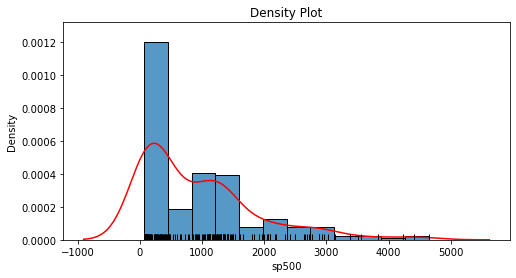

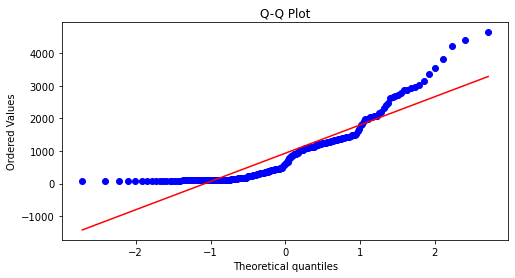

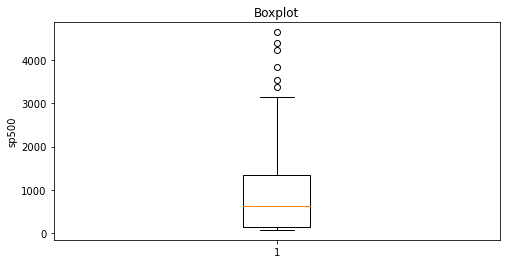

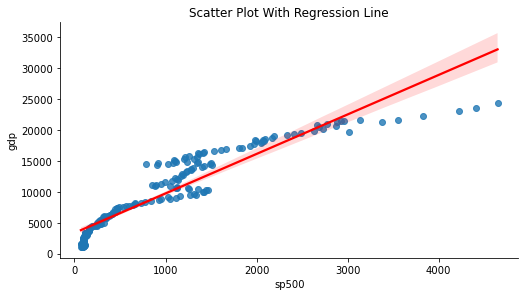

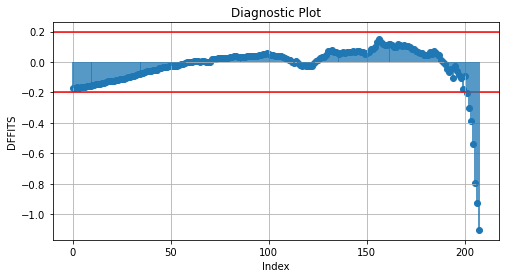

lambda = 0.07748107439019315 , which approximately equals to 0. Therefore, use log transformation.


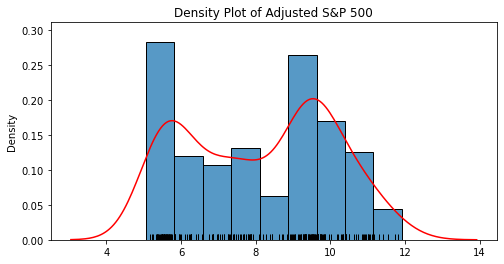

                            OLS Regression Results                            
Dep. Variable:                   agdp   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     762.2
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           3.73e-71
Time:                        22:06:41   Log-Likelihood:                -874.52
No. Observations:                 208   AIC:                             1753.
Df Residuals:                     206   BIC:                             1760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.9590      1.591     37.050      0.0

In [54]:
#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['sp500'],stat = 'density')
sns.kdeplot(df['sp500'], color = 'red')
sns.rugplot(df['sp500'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['sp500'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['sp500'])
plt.ylabel('sp500')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
sns.lmplot(data=df,x='sp500',y='gdp',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

#Regression result
sp_reg = smf.ols('agdp~sp500',data = df) 
sp_results = sp_reg.fit()
sp_results.params

#DFFITS
sp_dffits,sp_threshold = sp_results.get_influence().dffits
plt.figure(figsize = (8,4))
plt.scatter(df.index, sp_dffits)
plt.axhline(sp_threshold,color = 'red')
plt.axhline(-sp_threshold,color = 'red')
plt.vlines(x=df.index,ymin=0,ymax=sp_dffits)
plt.xlabel('Index')
plt.ylabel('DFFITS')
plt.title('Diagnostic Plot')
plt.grid()
plt.show()

#Check for Linear Transformation
bc_sp,lambda_sp  = stats.boxcox(df['sp500'])
print('lambda =', lambda_sp,', which approximately equals to 0. Therefore, use log transformation.')
plt.figure(figsize = (8,4))
plt.title('Density Plot of Adjusted S&P 500')
sns.histplot(bc_sp, stat = 'density')
sns.kdeplot(bc_sp, color = 'red')
sns.rugplot(bc_sp, color = 'black')
plt.show()

#Regression result after log transformation 
sp_reg1 = smf.ols('agdp~np.log(sp500)',data = df) 
sp_results1 = sp_reg1.fit()
sp_results1.params

print(sp_results.summary())
print(sp_results1.summary())
#The JB test for new regression result is much lower than the old result.
#The R square is improved.
#The new density plot is nearly normal distributed.

## Histogram,Q-Q plot for Net Exports

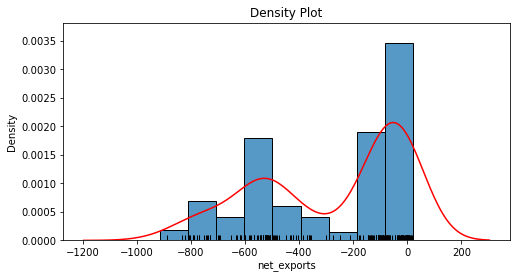

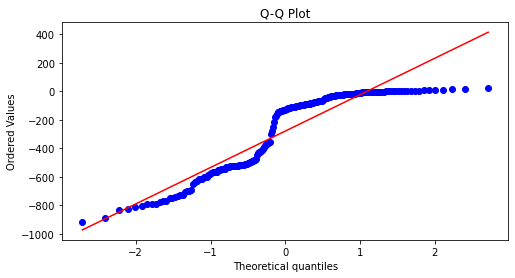

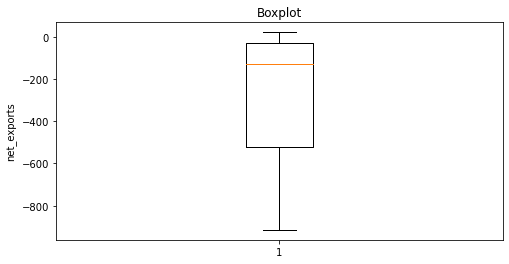

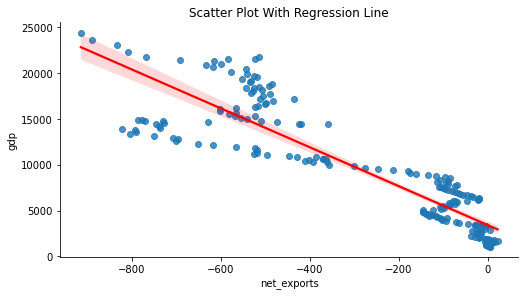

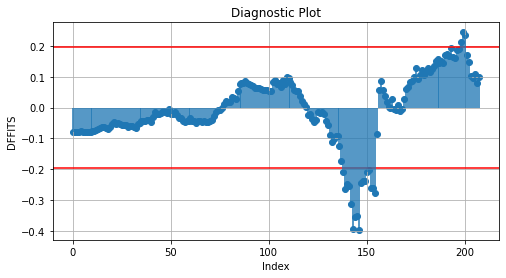

lambda = 1.43190322937287 , which approximately equals to 1.
                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     862.6
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           1.41e-75
Time:                        22:07:33   Log-Likelihood:                -1948.1
No. Observations:                 208   AIC:                             3900.
Df Residuals:                     206   BIC:                             3907.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [55]:
#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['net_exports'],stat = 'density')
sns.kdeplot(df['net_exports'], color = 'red')
sns.rugplot(df['net_exports'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['net_exports'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['net_exports'])
plt.ylabel('net_exports')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
sns.lmplot(data=df,x='net_exports',y='gdp',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

#Regression result
exports_reg = smf.ols('gdp~net_exports',data = df) 
exports_results = exports_reg.fit()
exports_results.params

#DFFITS
exports_dffits,exports_threshold = exports_results.get_influence().dffits
plt.figure(figsize = (8,4))
plt.scatter(df.index, exports_dffits)
plt.axhline(exports_threshold,color = 'red')
plt.axhline(-exports_threshold,color = 'red')
plt.vlines(x=df.index,ymin=0,ymax=exports_dffits)
plt.xlabel('Index')
plt.ylabel('DFFITS')
plt.title('Diagnostic Plot')
plt.grid()
plt.show()

#Check for Linear Transformation
yj_exports,lambda_exports  = stats.yeojohnson(df['net_exports'])
print('lambda =', lambda_exports,', which approximately equals to 1.')

print(exports_results.summary())
#The JB test for new regression result is roughly the same as the old result.
#The R square is nearly the same as well.
#So, there is no need to do any transformation.

## Correlation Plot

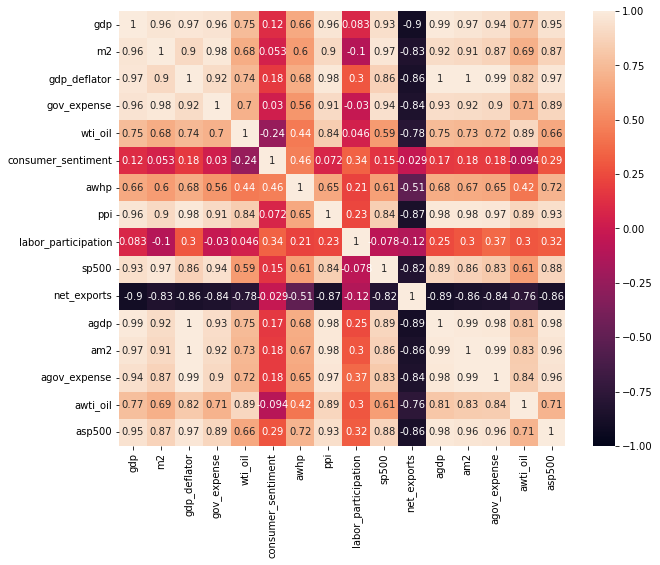

In [57]:
plt.figure(figsize = (10,8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

## Pairplot

<Figure size 720x576 with 0 Axes>

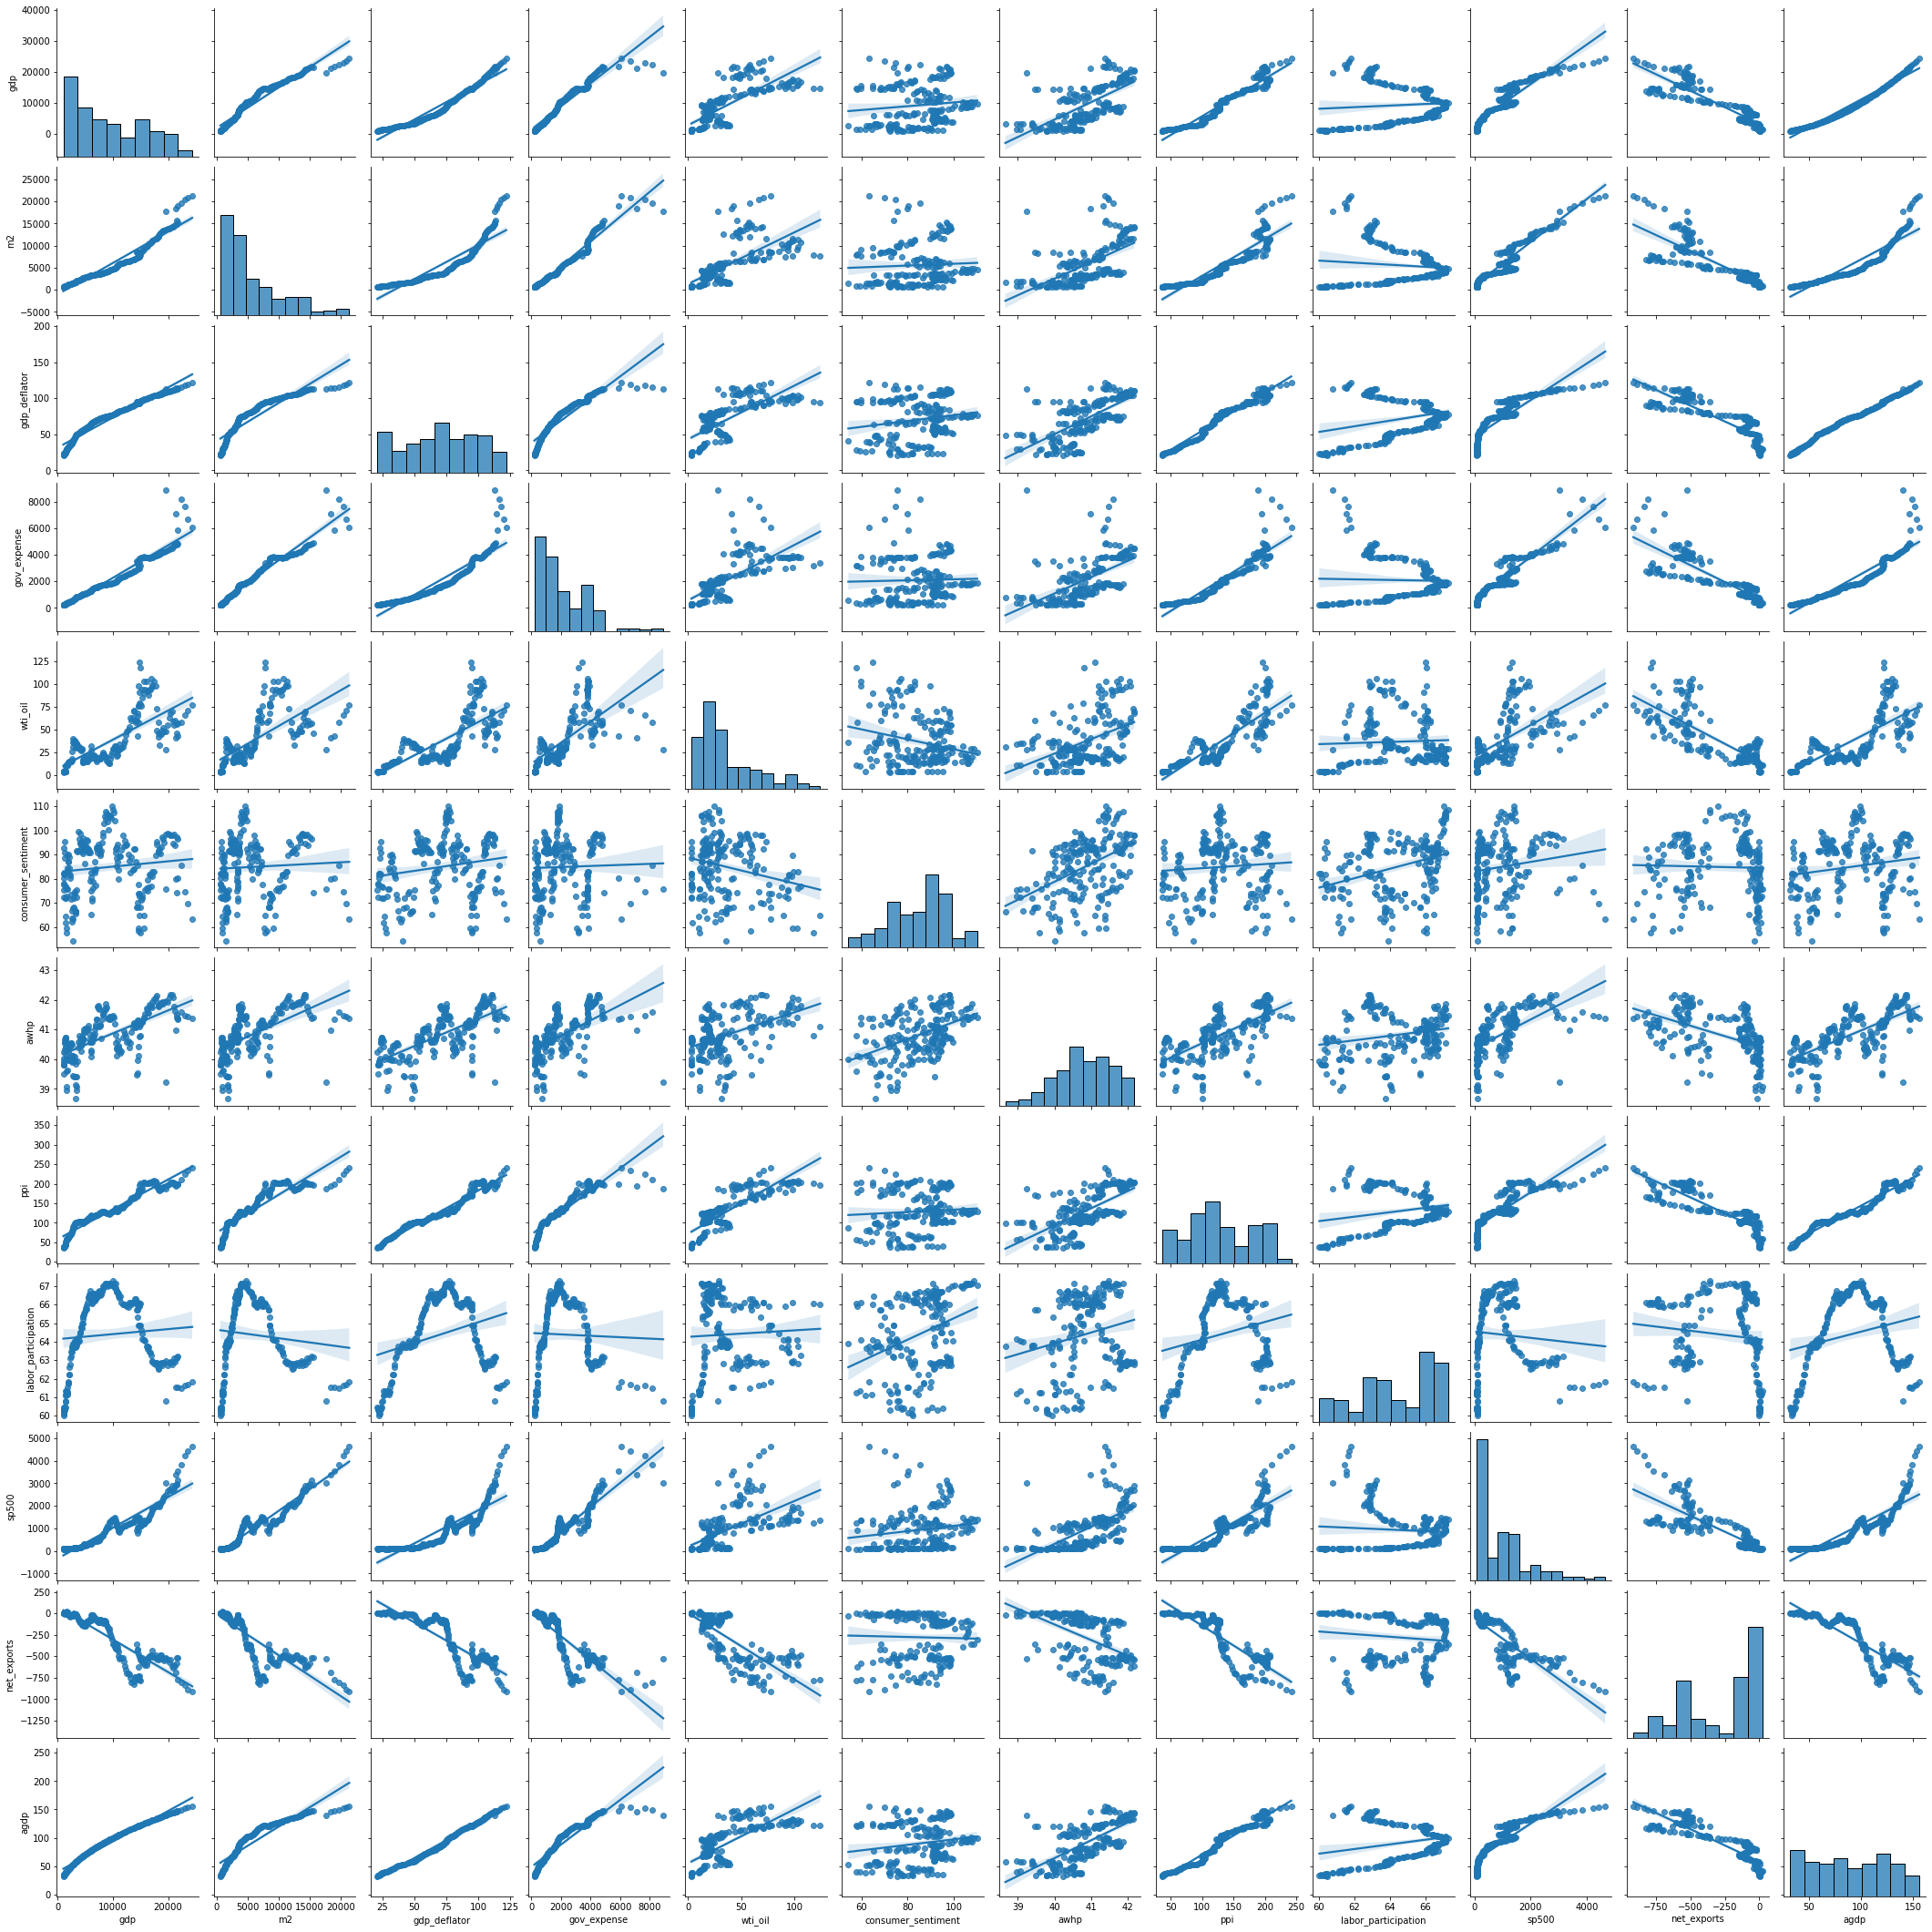

In [31]:
plt.figure(figsize = (10,8))
sns.pairplot(df,kind='reg')
plt.show()

### · Transformation:
(a) & (b) From the density estimation and Q-Q Plot, we can tell that M2, Government Expense, WTI Oil, sp500 are right skewed and not normally distributed.

(c) From power transformation test for M2, Government Expense, WTI Oil, sp500, the results are 0.102, 0.227, 0.253 and 0.077 respectively, hence we will use log transformation to make them normally distributed. If we do not transform the data, the majority of sample is clustered on the lower values, which will make the regression result unstable. Then, we will get biased result in the following OLS models analysis. After transformation, the regression results will have lower R^2 and perform better.

(d) From the boxplot and DFFITS shown above, the outliers locate at the last several observations. Since the government increased money supply and government expense dramatically to ease the negative shocks from COVID-19, which leads to those outliers.

(e) There is no null value in this dataset.

### · No Transformation:
(a) & (b) & (c)From the density estimation and the Q-Q Plot, we can tell that GDP Deflator, Consumer Sentiment, Average Weekly Hours Production, PPI are nearly normally distributed. Since the result of power transformation test for them are 0.959, 1.870, 9.105(out of -5 to 5) and 0.815 respectively, hence, they does not need to be transformed. However, for Labor Force paticipation and Net Exports, they are not normally distributed and their results of power transformation test are 9.101(out of -5 to 5) and 1.432 respectively. Hence, they does not need to be transformed. 

(d) From Box Plot and DFFITS diagram, there are outliers in the dataset.

(e) There is no null value in this dataset.

### · Correlation Matrix:
Consumer Sentiment and Labor Force Participation Rate don't have strong correlation with GDP, so we can already expect their explainatory power, R^2, to be low. The rest of the variables are strongly correlated with GDP, so we can already expect a much better explaintory power than Consumer Sentiment and Labor Force Participation Rate.

# 2. Variable Selection:

### (a) Using the Boruta Algorithm identify the top 2 predictors.

In [32]:
df['am2'] = np.log(df['m2'])
df['agov_expense'] = np.log(df['gov_expense'])
df['awti_oil'] = np.log(df['wti_oil'])
df['asp500'] = np.log(df['sp500'])

boruta_data = df[["agdp","am2", "gdp_deflator", "agov_expense", "awti_oil", "consumer_sentiment",
                  "awhp", "ppi", "labor_participation","asp500","net_exports"]].copy()

In [33]:
from BorutaShap import BorutaShap
x = boruta_data.iloc[:, 1:]
y = boruta_data['agdp']

  0%|          | 0/50 [00:00<?, ?it/s]

10 attributes confirmed important: ['awti_oil', 'am2', 'consumer_sentiment', 'net_exports', 'ppi', 'labor_participation', 'asp500', 'agov_expense', 'gdp_deflator', 'awhp']
0 attributes confirmed unimportant: []
0 tentative attributes remains: []


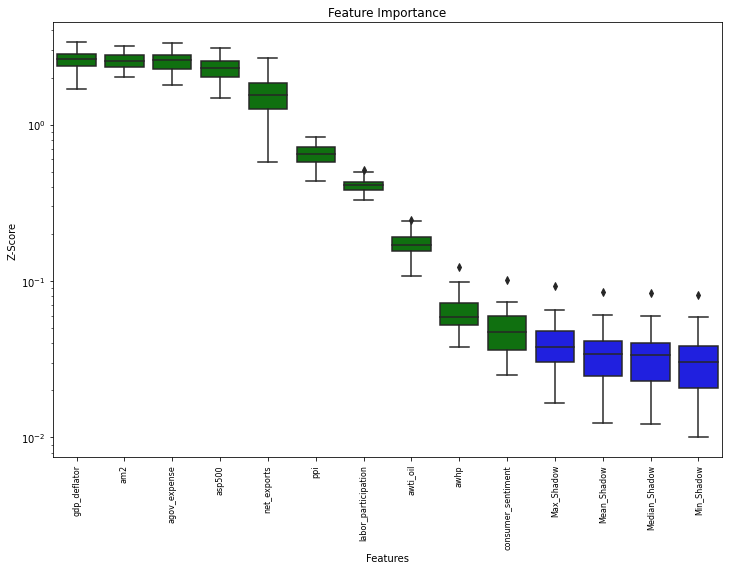

In [34]:
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
Feature_Selector.fit(X=x, y=y, n_trials=50, random_state=0)
Feature_Selector.plot(which_features='all')

### Bornuta Selection
According to Bornuta test, the top 2 predictors are GDP deflator and M2.

### (b) Using Mallows Cpidentify the top 2 predictors.

In [59]:
subdat = df[["agdp", "am2", "gdp_deflator", "agov_expense", "awti_oil", "consumer_sentiment",
                  "awhp", "ppi", "labor_participation","asp500","net_exports"]].copy()
model=smf.ols(
    formula=
    'agdp ~am2+gdp_deflator+agov_expense+wti_oil+consumer_sentiment+awhp+ppi+labor_participation+asp500+net_exports'
    , data=df)
results = model.fit()
y = df['agdp']
y_pred = results.fittedvalues

# You need to run each sub regression individually, and get the score for each subset
# Using subset size =1
storage_cp = pd.DataFrame(columns = ["Variables", "CP"])
  
for subset in itertools.combinations(subdat.columns[1:], 1):
  formula1 = 'agdp~'+'+'.join(subset)
  mr_sub = smf.ols(formula=formula1, data=df)
  mr_sub_fit = mr_sub.fit()
  y_sub=mr_sub_fit.fittedvalues
    
  k = 11 # number of parameters in orginal model (includes y-intercept)
  p = 1 # number of parameters in the subset model (includes y-intercept)

  cp = mallow.mallow(y, y_pred,y_sub, k, p)
  storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
print(storage_cp.sort_values(by = "CP"))

                Variables             CP
1         (gdp_deflator,)    1491.490838
0                  (am2,)    3374.792364
2         (agov_expense,)    7992.610252
6                  (ppi,)    8844.028581
8               (asp500,)    9187.127605
9          (net_exports,)   43890.409877
3             (awti_oil,)   73733.218374
5                 (awhp,)  114778.472362
7  (labor_participation,)  200151.117185
4   (consumer_sentiment,)  206863.820331


### Mallow CP Selection
According to Mallow CP test, the top 2 predictors are GDP deflator and M2.

# 3. Model Building: Residual Plot and Cook's Distance Plot: M2 VS Deflator

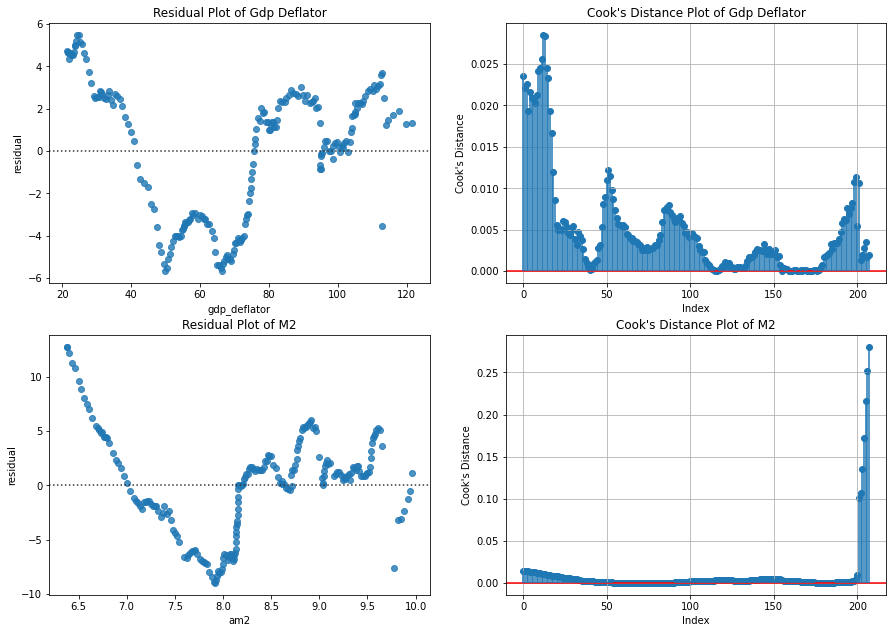

In [37]:
fig=plt.figure(figsize=(15,22))

# Residual Plot of Gdp Deflator 
ax=fig.add_subplot(4,2,1) 
sns.residplot(x=df['gdp_deflator'],y=df['agdp'],data=df)
plt.xlabel('gdp_deflator')
plt.ylabel('residual')
plt.title('Residual Plot of Gdp Deflator')

# Cook's Distance Plot of Gdp Deflator
ax=fig.add_subplot(4,2,2)
deflator_distance = deflator_results.get_influence().cooks_distance
plt.scatter(df.index, deflator_distance[0])
plt.axhline(0,color='red')
plt.vlines(x = df.index,ymin=0,ymax=deflator_distance[0])
plt.xlabel('Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot of Gdp Deflator")
plt.grid()

# Residual Plot of M2
ax=fig.add_subplot(4,2,3)
sns.residplot(x=df['am2'],y=df['agdp'],data=df)
plt.xlabel('am2')
plt.ylabel('residual')
plt.title('Residual Plot of M2')

# Cook's Distance Plot of M2
ax=fig.add_subplot(4,2,4)
m2_distance = m2_results.get_influence().cooks_distance
plt.scatter(df.index, m2_distance[0])
plt.axhline(0,color='red')
plt.vlines(x = df.index,ymin=0,ymax=m2_distance[0])
plt.xlabel('Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot of M2")
plt.grid()
plt.show()

In [38]:
# gdp deflator
def_coefs = pd.DataFrame(columns = ["def_B0","def_B1"])

for i in range(1000):
    
    sample = df.sample(df.shape[0] ,replace = True)
    
    results = smf.ols('agdp ~ gdp_deflator', sample).fit()
    
    def_b0,def_b1 = results.params
    
    def_coefs = def_coefs.append({"def_B0":def_b0, "def_B1":def_b1}, ignore_index = True)

def_B0_u = def_coefs['def_B0'].quantile(0.975)
def_B1_u = def_coefs['def_B1'].quantile(0.975)
def_B0_l = def_coefs['def_B0'].quantile(0.025)
def_B1_l = def_coefs['def_B1'].quantile(0.025)

# m2
coefs = pd.DataFrame(columns = ["am2_B0","am2_B1"])

for i in range(1000):
    
    sample = df.sample(df.shape[0] ,replace = True)
    
    results = smf.ols('agdp ~ am2', sample).fit()
    
    b0,b1 = results.params
    
    coefs = coefs.append({"am2_B0":b0, "am2_B1":b1}, ignore_index = True)

am2_B0_u = coefs['am2_B0'].quantile(0.975)
am2_B1_u = coefs['am2_B1'].quantile(0.975)
am2_B0_l = coefs['am2_B0'].quantile(0.025)
am2_B1_l = coefs['am2_B1'].quantile(0.025)

In [39]:
print([def_B0_l,def_B0_u])
print([def_B1_l,def_B1_u])

print([am2_B0_l,am2_B0_u])
print([am2_B1_l,am2_B1_u])

[-0.8411003721572615, 2.0533033213773173]
[1.2496736624704408, 1.2841580724447492]
[-228.09675694976002, -214.10532213873424]
[36.907907410179156, 38.5142243302278]


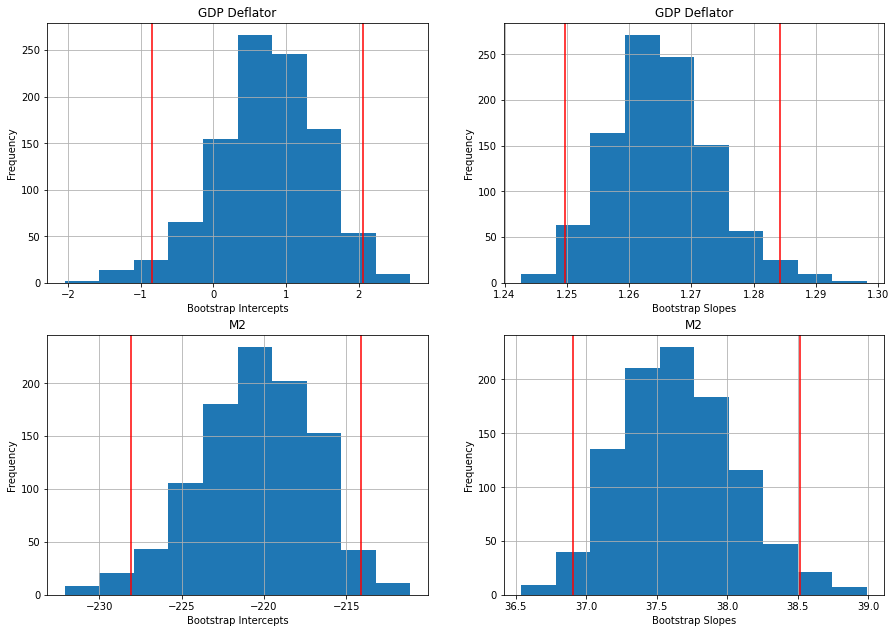

In [41]:
fig=plt.figure(figsize=(15,22))

# gdp deflator
ax=fig.add_subplot(4,2,1) 
def_coefs.def_B0.hist()
plt.xlabel("Bootstrap Intercepts")
plt.ylabel("Frequency")
plt.title('GDP Deflator')
plt.axvline(def_B0_u, color = "red")
plt.axvline(def_B0_l, color = "red")

ax=fig.add_subplot(4,2,2) 
def_coefs.def_B1.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.title('GDP Deflator')
plt.axvline(def_B1_u, color = "red")
plt.axvline(def_B1_l, color = "red")

#m2
ax=fig.add_subplot(4,2,3) 
coefs.am2_B0.hist()
plt.xlabel("Bootstrap Intercepts")
plt.ylabel("Frequency")
plt.title('M2')
plt.axvline(am2_B0_u, color = "red")
plt.axvline(am2_B0_l, color = "red")

ax=fig.add_subplot(4,2,4) 
coefs.am2_B1.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.title('M2')
plt.axvline(am2_B1_u, color = "red")
plt.axvline(am2_B1_l, color = "red")
plt.show()

In [42]:
from sklearn.model_selection import KFold

#deflator
kf = KFold(n_splits = 5)

def_mse = []
for train_index, test_index in kf.split(df):
    # train data over training set
    def_results = smf.ols('agdp ~ gdp_deflator', df.iloc[train_index]).fit()
    
    # test over last split 
    def_s = (((df.iloc[test_index]["agdp"]) - results.predict(df.iloc[test_index]))**2).mean()
    
    # append test metric
    def_mse.append(def_s)

print(def_mse)
print('The average score is',np.mean(def_mse))


#m2

mse = []
for train_index, test_index in kf.split(df):
    # train data over training set
    results = smf.ols('agdp ~ am2', df.iloc[train_index]).fit()
    
    # test over last split 
    s = (((df.iloc[test_index]["agdp"]) - results.predict(df.iloc[test_index]))**2).mean()
    
    # append test metric
    mse.append(s)

print(mse)
print('The average score is',np.mean(mse))

[37.515589059160895, 38.94748671013176, 9.092748414119582, 10.762063230829956, 7.2444794734193145]
The average score is 20.7124733775323
[153.35330155869264, 72.2718081683269, 9.814793145910587, 16.589247337784247, 13.755666561381611]
The average score is 53.156963354419204


In [58]:
results10 = smf.ols('agdp ~ gdp_deflator', df.iloc[:int(np.round(len(df))*0.7)]).fit()
     
s10 = (((df.iloc[int(np.round(len(df))*0.7):]["agdp"]) 
        - results10.predict(df.iloc[int(np.round(len(df))*0.7):]))**2).mean()

print(s10)

results11 = smf.ols('agdp ~ am2', df.iloc[:int(np.round(len(df))*0.7)]).fit()
     
s11 = (((df.iloc[int(np.round(len(df))*0.7):]["agdp"]) 
        - results11.predict(df.iloc[int(np.round(len(df))*0.7):]))**2).mean()

print(s11)
    

29.282067955059663
49.83789323333271


# Model Selection and Conclusion:

We prefer the OLS model of GDP Deflator. The reasons are as follows:

1)GDP Deflator is normally distributed, while M2 needs transformation to become normally distributed;
  
2)GDP Deflator's JB score is 0.001, and M2's JB score is 0.145;

3)GDP Deflator R^2 is 0.992, M2 R^2 is 0.983, though GDP Deflator's intercept is not significant;

4)According to the Cook's Distance Plot, M2 has fewer outliers than GDP defltor, but we can't determine which regression is better from the residual plots and Cook's Distance Plot;

5)From Bootstrapping, we calculated the confidence intervals of both variables which show that both regression models are robust since their parameters lie in the intervals;

6)From the k fold validation, the average mse scores for GDP Deflator and M2 are 20.735 and 53.157 respectively, so GDP Deflator performs better than M2. 

In conclusion, the regression model of GDP Deflator has a better performance. Our result shows that GDP Deflator is the best index to explain GDP in all the common indexs we choose. Since the government increased money supply dramatically to combat the negative shock from COVID-19 and stimulate GDP growth, GDP Deflator moved violently in response, driving a simultaneous movement in GDP. 